# Лабораторная №1
## Задание

Имеетсе выборка некоторой случайной величины ξ в виде интервального статистического ряда (табл.).

а) Построить гистограмму и график эмперической функции распределения F<sub>n</sub>(x)

б) Вычислить выборочные: среднее, дисперсию, медиану, коэффициент вариации, коэффициент асимметрии, эксцесс

в) Добавить искусственно к данным большую флуктуацию (порядка 1000). Как изменятся вычесленные параметры? Почему?

**Вариант 17:**

| **Интервал**   | (140;145)  | (145;150)  | (150;155)  | (155;160)  | (160;165)  |
|:--------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|  **Частота**   |     45     |     105    |    100     |     40     |     10     |

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
amounts = [45, 105, 100, 40, 10]
intervals = [(140,145), (145,150), (150,155), (155,160), (160,165)]

In [46]:
def intervals2str(intervals):
    return [str(interval) for interval in intervals]

In [63]:
def plot_hist(intervals, amounts): #emperical distribution function plot
    total_amount = sum(amounts)
    proportion_amounts = [amount/total_amount for amount in amounts]
    step = intervals[0][1]-intervals[0][0]
    hist_amounts = [amount/step for amount in proportion_amounts]

    fig = plt.figure(figsize=(6,4))
    plt.title('Гистограмма')
    for interval, hist_value in zip(intervals, hist_amounts):
        plt.vlines(x = interval[0], ymin = 0, ymax = hist_value)
        plt.vlines(x = interval[1], ymin = 0, ymax = hist_value)
        plt.hlines(y=hist_value, xmin = interval[0], xmax= interval[1])
        
    plt.plot()

    # fig = plt.figure(figsize=(6,4))
    # plt.title('Гистограмма')
    # plt.bar(intervals2str(intervals),hist_amounts,width=1)
    # plt.plot()

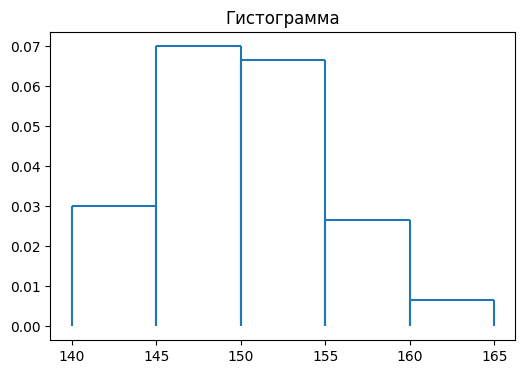

In [64]:
plot_hist(intervals, amounts)

In [16]:
from numpy import cumsum
def plot_esdf(intervals, amounts): #emperical distribution function plot
    total_amount = sum(amounts)
    proportion_amounts = [amount/total_amount for amount in amounts]
    empirical_distribution_function = list(cumsum(proportion_amounts))

    fig = plt.figure(figsize=(6,4))
    plt.title('Эмперическая функция распределения')
    step = intervals[0][1] - intervals[0][0]
    intervals_with_additions = [(intervals[0][0]-step, intervals[0][1]-step)] + intervals + [(intervals[-1][0]+step, intervals[-1][1]+step)]
    empirical_distribution_function.insert(0, 0)
    empirical_distribution_function.append(1)

    for interval, distribution_value in zip(intervals_with_additions, empirical_distribution_function):
        plt.vlines(x = interval[0], ymin = 0, ymax = distribution_value, linestyles='dotted')
        plt.vlines(x = interval[1], ymin = 0, ymax = distribution_value, linestyles='dotted')
        plt.hlines(y=distribution_value, xmin = interval[0], xmax= interval[1])

    plt.plot()

In [17]:
plot_esdf(intervals, amounts)

NameError: name 'plt' is not defined

In [5]:
def average(intervals, amounts) -> float:
    N = sum(amounts)
    result = 0.0
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += dz * amounts[i] / N
    return result

In [6]:
average(intervals, amounts)

150.25

In [7]:
def dispersion(intervals, amounts) -> float:
    N = sum(amounts)
    result = 0.0
    avg = average(intervals, amounts)
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += (dz-avg)*(dz-avg) * amounts[i] / N
    return result

In [20]:
dispersion(intervals, amounts)

25.354166666666664

In [12]:
def dispersion_fixed(intervals, amounts):
    N = len(amounts)
    return N / (N-1) * dispersion(intervals, amounts)

In [13]:
dispersion_fixed(intervals, amounts)

31.69270833333333

In [ ]:
# медиана!!

In [14]:
from math import sqrt
def coeff_of_variation(intervals, amounts):
    S2n = dispersion(intervals, amounts)
    avg = average(intervals, amounts)
    return sqrt(S2n)/avg

In [15]:
coeff_of_variation(intervals, amounts)

0.03351275948978545